# Lab Assignment 06

## Devam Gandhi
## ID-202518008

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## Part 1: Data Exploration and Preprocessing

In [ ]:
df = pd.read_csv('Mall_Customers.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df_selected = df[["Annual Income (k$)", "Spending Score (1-100)"]]

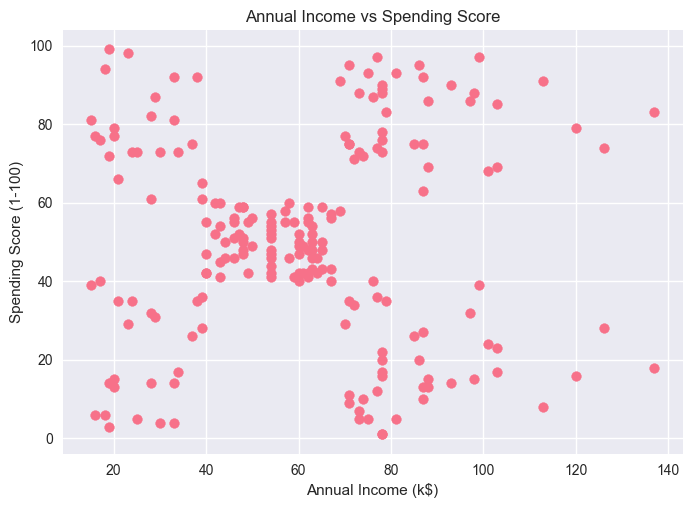

In [8]:
# Visializatiom
plt.scatter(df_selected["Annual Income (k$)"], df_selected["Spending Score (1-100)"])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Annual Income vs Spending Score")
plt.show()

In [15]:
X = df_selected.values
feature_names = df_selected.columns

# Standardize the features (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Original data shape:", X.shape)
print("Scaled data shape:", X_scaled.shape)

print("\nOriginal data statistics:")
print(pd.DataFrame(X, columns=feature_names).describe())

print("\nScaled data statistics:")
print(pd.DataFrame(X_scaled, columns=feature_names).describe())

Original data shape: (200, 2)
Scaled data shape: (200, 2)

Original data statistics:
       Annual Income (k$)  Spending Score (1-100)
count          200.000000              200.000000
mean            60.560000               50.200000
std             26.264721               25.823522
min             15.000000                1.000000
25%             41.500000               34.750000
50%             61.500000               50.000000
75%             78.000000               73.000000
max            137.000000               99.000000

Scaled data statistics:
       Annual Income (k$)  Spending Score (1-100)
count        2.000000e+02            2.000000e+02
mean        -2.131628e-16           -1.465494e-16
std          1.002509e+00            1.002509e+00
min         -1.738999e+00           -1.910021e+00
25%         -7.275093e-01           -5.997931e-01
50%          3.587926e-02           -7.764312e-03
75%          6.656748e-01            8.851316e-01
max          2.917671e+00            1.8

# Part 2: K-Means Clustering

## Finding the Optimal Number of Clusters (k):

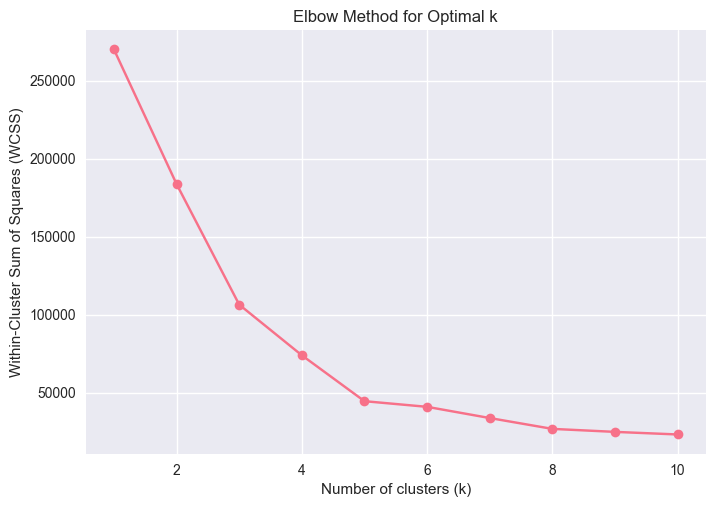

In [18]:
wcss = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(df_selected)
    wcss.append(kmeans.inertia_)

plt.plot(k_values, wcss, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for Optimal k")
plt.show()

## Applying K-Means:

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

print("K-Means cluster centers:")
print(kmeans.cluster_centers_)

print("\nCluster assignments:")
print(np.bincount(kmeans_labels))

print(f"\nInertia (WCSS): {kmeans.inertia_:.2f}")

K-Means cluster centers:
[[-0.20091257 -0.02645617]
 [ 0.99158305  1.23950275]
 [-1.32954532  1.13217788]
 [ 1.05500302 -1.28443907]
 [-1.30751869 -1.13696536]]

Cluster assignments:
[81 39 22 35 23]

Inertia (WCSS): 65.57


## Visualize K-Means Results:

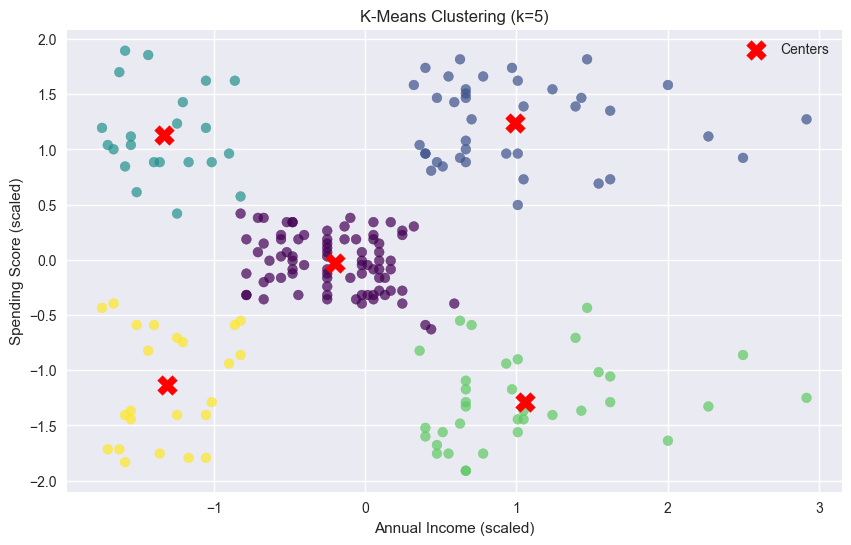

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)


plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis', s=50, alpha=0.7)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Centers')

plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.title("K-Means Clustering (k=5)")
plt.legend()
plt.show()

##  Part 3: Agglomerative Hierarchical Clustering

## Creating a Dendrogram:

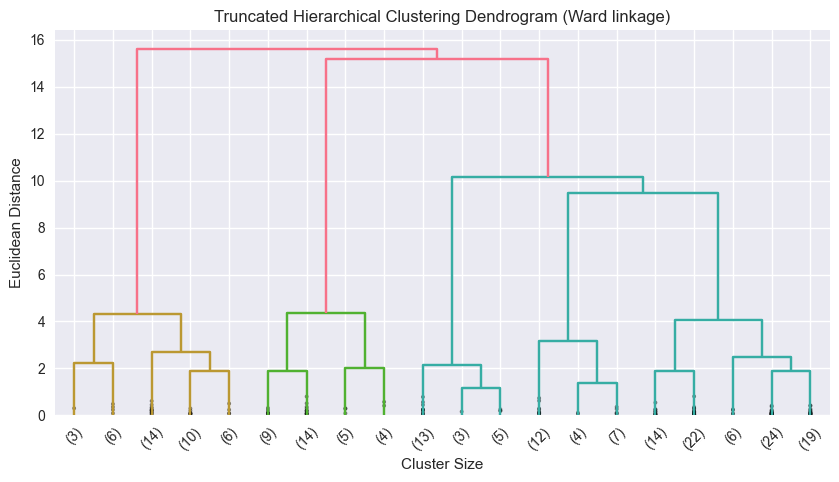

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(X_scaled, method='ward')


plt.figure(figsize=(10, 5))
dendrogram(linked,
           truncate_mode='lastp',  
           p=20,                  
           leaf_rotation=45.,    
           leaf_font_size=10., 
           show_contracted=True)   
plt.title('Truncated Hierarchical Clustering Dendrogram (Ward linkage)')
plt.xlabel('Cluster Size')
plt.ylabel('Euclidean Distance')
plt.show()

## Applying Hierarchical Clustering:

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np

best_aggl_n = None
best_aggl_s = -np.inf

# Try k = 2 to 10 and find the best silhouette score
for k in range(2, 11):
    ag = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels_k = ag.fit_predict(X_scaled)
    s = silhouette_score(X_scaled, labels_k)
    if s > best_aggl_s:
        best_aggl_s, best_aggl_n = s, k

print('Best Agglomerative k by silhouette:', best_aggl_n, 'score =', round(best_aggl_s, 4))
agglom = AgglomerativeClustering(n_clusters=best_aggl_n, linkage='ward')
aggl_labels = agglom.fit_predict(X_scaled)


Best Agglomerative k by silhouette: 5 score = 0.5538


## Visualize Hierarchical Clustering Results:

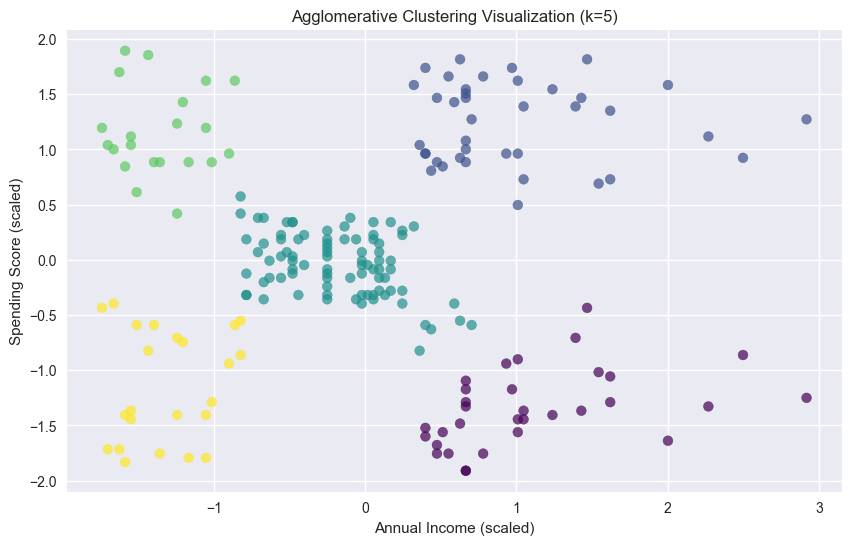

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=aggl_labels, cmap='viridis', s=50, alpha=0.7)
import numpy as np
centers = np.array([X_scaled[aggl_labels == i].mean(axis=0) for i in range(best_aggl_n)])

plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.title(f"Agglomerative Clustering Visualization (k={best_aggl_n})")
plt.legend()
plt.show()

# Part 4: DBSCAN Clustering

##  Applying DBSCAN:

In [ ]:
X_original = df_selected.values
dbscan = DBSCAN(eps=10, min_samples=7)
dbscan_labels = dbscan.fit_predict(X_original)
print("DBSCAN clustering assignments:")
unique_labels = np.unique(dbscan_labels)
for label in unique_labels:
    if label == -1:
        print(f"Noise points: {np.sum(dbscan_labels == label)}")
    else:
        print(f"Cluster {label}: {np.sum(dbscan_labels == label)} points")

# Summary
print(f"\nNumber of clusters: {len(unique_labels) - (1 if -1 in unique_labels else 0)}")
print(f"Number of noise points: {np.sum(dbscan_labels == -1)}")

DBSCAN clustering assignments:
Noise points: 23
Cluster 0: 12 points
Cluster 1: 16 points
Cluster 2: 95 points
Cluster 3: 31 points
Cluster 4: 23 points

Number of clusters: 5
Number of noise points: 23


## Visualize DBSCAN Results

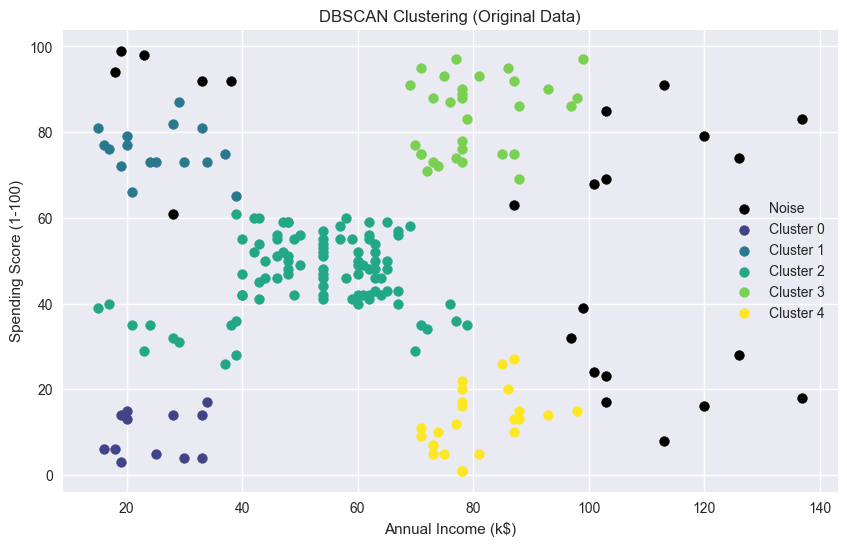

In [ ]:
# Visualization

X_original = df_selected.values

# Fit DBSCAN
dbscan = DBSCAN(eps=10, min_samples=7)
db_labels = dbscan.fit_predict(X_original)

plt.figure(figsize=(10, 6))

unique_labels = np.unique(db_labels)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    if label == -1:
        plt.scatter(X_original[db_labels == label, 0],
                    X_original[db_labels == label, 1],
                    c='black', s=50, label='Noise')
    else:
        plt.scatter(X_original[db_labels == label, 0],
                    X_original[db_labels == label, 1],
                    c=color.reshape(1,-1), s=50, label=f'Cluster {label}')

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("DBSCAN Clustering (Original Data)")
plt.legend()
plt.show()

In [65]:
from sklearn.metrics import silhouette_score
result_db = silhouette_score(X_original,db_labels)
print(result_db)

0.42084049577844984
